In [1]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.losses import mean_absolute_percentage_error

Using TensorFlow backend.


In [2]:
# watch for any changes in the utils module, and reload it automatically
%load_ext autoreload
%autoreload 2

In [3]:
from utils.generate_models import generate_models, generate_DeepConvLSTM_model
from utils.validate_models import find_best_architecture, find_best_architecture_cv, evaluate_model
from utils.data_generator import DataGenerator
from utils.get_dataset_pulsi import get_dataset_pulsi

In [4]:
columns = np.array(['bpm', 'spo2'])
dataset_reduced_std, dataset_reduced = get_dataset_pulsi(columns,
                                                         filename='./utils/test_data/42nights.csv')

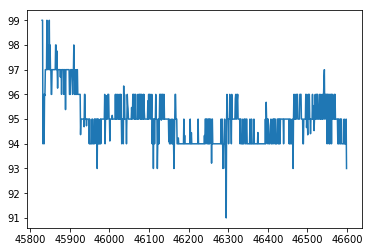

In [5]:
plt.plot(dataset_reduced[dataset_reduced["name"] == 'h_17-04-27']["spo2"])

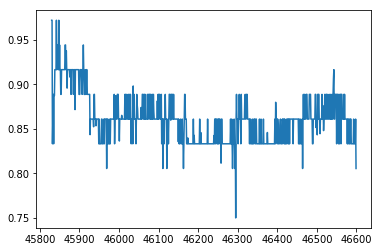

In [6]:
plt.plot(dataset_reduced_std[dataset_reduced_std["name"] == 'h_17-04-27']["spo2"])

In [7]:
window_size = 12            # ventana de valores para la prediccion
dim_length = window_size
number_of_predictions = 4   # numero de predicciones en la salida
output_dim = number_of_predictions
target_variable = "spo2"
dim_channels = 2            # 2 variables

In [8]:
#cv_fold_size = len(val_gen)*batch_size
batch_size = 32
metric = mean_absolute_percentage_error

In [9]:
train_names_reduced = np.array(['p_17-01-19', 'p_17-01-20'])
val_names_reduced = np.array(['p_17-01-21'])
test_names_reduced = np.array(['p_17-01-22'])
train_gen_reduced = DataGenerator(dataset_reduced_std, train_names_reduced,
                                  "spo2", batch_size=batch_size,
                                  number_of_predictions=number_of_predictions,
                                  window_size=window_size,
                                  step_prediction_dates=1, shuffle=False,
                                  shuffle_and_sample=False, debug=False)
val_gen_reduced = DataGenerator(dataset_reduced_std, val_names_reduced,
                                "spo2", batch_size=batch_size,
                                number_of_predictions=number_of_predictions,
                                window_size=window_size,
                                step_prediction_dates=1, shuffle=False,
                                shuffle_and_sample=False, debug=False)
test_gen_reduced = DataGenerator(dataset_reduced_std, test_names_reduced,
                                 "spo2", batch_size=batch_size,
                                 number_of_predictions=number_of_predictions,
                                 window_size=window_size,
                                 step_prediction_dates=1, shuffle=False,
                                 shuffle_and_sample=False, debug=False)

In [25]:
# simple
hyperparameters_simple = {}
regularization_rate_simple = 10 ** -4 # max bound
hyperparameters_simple['regularization_rate'] = regularization_rate_simple
learning_rate_simple = 10 ** -4 # max bound
hyperparameters_simple['learning_rate'] = learning_rate_simple
filters_simple = []
hyperparameters_simple['filters'] = filters_simple
lstm_dims_simple = [100]
hyperparameters_simple['lstm_dims'] = lstm_dims_simple

dropout_rnn_simple = 0.75
dropout_cnn_simple = 0.75

nrepochs_simple = 150

In [26]:
model = generate_DeepConvLSTM_model(dim_length, dim_channels, output_dim,
                                    filters_simple, lstm_dims_simple, learning_rate_simple,
                                    regularization_rate_simple, dropout=None,
                                    dropout_rnn=dropout_rnn_simple, dropout_cnn=dropout_cnn_simple,
                                    metrics=[mean_absolute_percentage_error])

models_simple = [(model, hyperparameters_simple)]

In [28]:
# in this case, find_best_architecture is only used for training the model
np.random.seed(3)
verbose=True
early_stopping=False

best_model_losses, best_params_losses, best_model_metrics, best_params_metrics, debug = \
    find_best_architecture(train_gen_reduced, val_gen_reduced, test_gen_reduced,
                           verbose=False, number_of_models=None, nr_epochs=nrepochs_simple,
                           early_stopping=True, batch_size=batch_size,
                           models=models_simple, metric=mean_absolute_percentage_error, use_testset=True,
                           debug=False, test_retrain=False, output_all=True)

In [29]:
train_predict, val_predict, test_predict = \
    evaluate_model(train_gen_reduced, val_gen_reduced, test_gen_reduced,
                   best_model_losses)

training error = [0.014086888013583309, 304027.4681475841]
validation error = [0.008331383788163027, 7.483084817677612]
testing error = [0.006949393410392879, 6.285189420733101]


In [30]:
# from GC_find_best_arch_250_rnn_1_pulsi
hyperparameters_losses = {}
regularization_rate_losses = 0.0001
hyperparameters_losses['regularization_rate'] = regularization_rate_losses
learning_rate_losses = 0.0089
hyperparameters_losses['learning_rate'] = learning_rate_losses
filters_losses = []
hyperparameters_losses['filters'] = filters_losses
lstm_dims_losses = [63]
hyperparameters_losses['lstm_dims'] = lstm_dims_losses

dropout_rnn_losses = 0.85
dropout_cnn_losses = None

nrepochs_losses = 58

In [31]:
model = generate_DeepConvLSTM_model(dim_length, dim_channels, output_dim,
                                    filters_losses, lstm_dims_losses, learning_rate_losses,
                                    regularization_rate_losses, dropout=None,
                                    dropout_rnn=dropout_rnn_losses, dropout_cnn=dropout_cnn_losses,
                                    metrics=[mean_absolute_percentage_error])
models_losses = [(model, hyperparameters_losses)]

In [32]:
# in this case, find_best_architecture is only used for training the model
np.random.seed(3)
verbose=True
early_stopping=False

best_model_losses, best_params_losses, best_model_metrics, best_params_metrics, debug = \
    find_best_architecture(train_gen_reduced, val_gen_reduced, test_gen_reduced,
                           verbose=False, number_of_models=None, nr_epochs=nrepochs_losses,
                           early_stopping=True, batch_size=batch_size,
                           models=models_losses, metric=mean_absolute_percentage_error, use_testset=True,
                           debug=False, test_retrain=False, output_all=True)

In [33]:
train_predict, val_predict, test_predict = \
    evaluate_model(train_gen_reduced, val_gen_reduced, test_gen_reduced,
                   best_model_losses)

training error = [0.0031894762320417817, 353878.1001747151]
validation error = [0.003579122405701512, 5.075151558607542]
testing error = [0.0029940225404951303, 4.526344118077001]


In [35]:
# full dataset
train_names = np.array(['p_17-01-19', 'p_17-01-20', 'p_17-01-21', 'p_17-01-22', 'p_17-01-23', 'p_17-01-24', 'p_17-01-25',
                        'p_17-01-26', 'p_17-01-27', 'p_17-01-28', 'p_17-01-29', 'p_17-01-30', 'p_17-01-31', 'p_17-02-01',
                        'p_17-02-02', 'p_17-02-03', 'p_17-02-04', 'p_17-02-05', 'p_17-02-06', 'p_17-02-07', 'p_17-02-08',
                        'p_17-02-09', 'p_17-02-10'])
val_names = np.array(['p_17-02-11', 'p_17-02-12', 'p_17-02-13', 'p_17-02-14', 'p_17-02-15', 'p_17-02-16', 'p_17-02-17', 'p_17-02-18'])
test_names = np.array(['p_17-02-19', 'p_17-02-20', 'p_17-02-21', 'p_17-02-22', 'p_17-02-23', 'p_17-02-24', 'p_17-02-25', 'p_17-04-27'])
train_gen = DataGenerator(dataset_reduced_std, train_names,
                          "spo2", batch_size=batch_size,
                          number_of_predictions=number_of_predictions,
                          window_size=window_size,
                          step_prediction_dates=1, shuffle=False,
                          shuffle_and_sample=False, debug=False)
val_gen = DataGenerator(dataset_reduced_std, val_names,
                        "spo2", batch_size=batch_size,
                        number_of_predictions=number_of_predictions,
                        window_size=window_size,
                        step_prediction_dates=1, shuffle=False,
                        shuffle_and_sample=False, debug=False)
test_gen = DataGenerator(dataset_reduced_std, test_names,
                         "spo2", batch_size=batch_size,
                         number_of_predictions=number_of_predictions,
                         window_size=window_size,
                         step_prediction_dates=1, shuffle=False,
                         shuffle_and_sample=False, debug=False)

In [36]:
# in this case, find_best_architecture is only used for training the model
np.random.seed(3)
verbose=True
early_stopping=False

best_model_losses, best_params_losses, best_model_metrics, best_params_metrics, debug = \
    find_best_architecture(train_gen, val_gen, test_gen,
                           verbose=True, number_of_models=None, nr_epochs=500, # let early stopping decide
                           early_stopping=True, batch_size=batch_size,
                           models=models_losses, metric=mean_absolute_percentage_error, use_testset=True,
                           debug=False, test_retrain=False, output_all=True)

Training model 0
{'regularization_rate': 0.0001, 'learning_rate': 0.0089, 'filters': [], 'lstm_dims': [63]}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_5 (Batch (None, 12, 2)             8         
_________________________________________________________________
lstm_5 (LSTM)                (None, 12, 63)            16632     
_________________________________________________________________
dropout_5 (Dropout)          (None, 12, 63)            0         
_________________________________________________________________
time_distributed_5 (TimeDist (None, 12, 4)             256       
_________________________________________________________________
lambda_5 (Lambda)            (None, 4)                 0         
Total params: 16,896
Trainable params: 16,892
Non-trainable params: 4
_________________________________________________________________
Epoch 1/500
826/826 [=========

In [37]:
train_predict, val_predict, test_predict = \
    evaluate_model(train_gen, val_gen, test_gen,
                   best_model_losses)

training error = [0.0036112990394335026, 32695.599054628485]
validation error = [0.0037278537688029086, 5.166705696672958]
testing error = [0.002995280285500709, 4.338842938655823]
